In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import time
import yfinance as yf

In [2]:
df = yf.download('BTC-USD', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1667 entries, 2017-01-01 to 2021-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1667 non-null   float64
 1   High       1667 non-null   float64
 2   Low        1667 non-null   float64
 3   Close      1667 non-null   float64
 4   Adj Close  1667 non-null   float64
 5   Volume     1667 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 91.2 KB


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [5]:
df = df[["Close"]]

In [6]:
df.describe()

,Close
count,1667.000000
mean,12144.569668
std,13332.944120
min,777.757019
25%,4875.684082
50%,8144.194336
75%,10984.666504
max,63503.457031


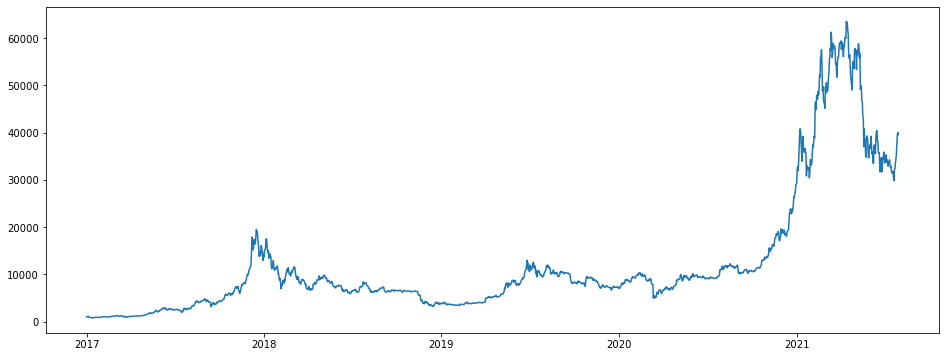

In [7]:
plt.figure(1, figsize=(16,6))
plt.plot(df.Close)

In [8]:
df["Returns"] = df.Close.pct_change()

C:\Users\David\anaconda3\envs\Block_Chain\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [9]:
df["Log_Returns"] = np.log(1 + df["Returns"])

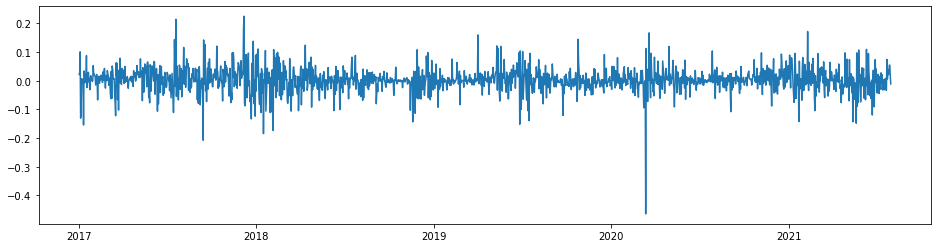

In [10]:
plt.figure(1, figsize=(16,4))
plt.plot(df.Log_Returns)

In [11]:
df.dropna(inplace=True)
X = df[["Close", "Log_Returns"]].values

C:\Users\David\anaconda3\envs\Block_Chain\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range = (0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [14]:
X_scaled[0]

array([0.00388984, 0.70729003])

In [15]:
y = [x[0] for x in X_scaled]

In [16]:
split = int(len(X_scaled) * 0.8)
print(split)

1332


In [17]:
X_train = X_scaled[:split]
X_test = X_scaled[split: len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [18]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [64]:
n = 60
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i]) # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i]) # predict next record

In [65]:
Xtrain[0]

array([[3.88984070e-03, 7.07290029e-01],
       [4.24200841e-03, 7.04675123e-01],
       [6.00986456e-03, 8.20020634e-01],
       [3.75640265e-03, 4.84388413e-01],
       [1.98393911e-03, 5.05213269e-01],
       [2.08571611e-03, 6.83890582e-01],
       [2.12738886e-03, 6.77833708e-01],
       [1.99393524e-03, 6.60290680e-01],
       [2.07127217e-03, 6.81437292e-01],
       [0.00000000e+00, 4.49741129e-01],
       [4.31672589e-04, 7.23277046e-01],
       [7.36970488e-04, 7.07756597e-01],
       [6.48138933e-04, 6.63833430e-01],
       [7.02119778e-04, 6.79654267e-01],
       [8.57335630e-04, 6.90742001e-01],
       [2.07540082e-03, 8.01094108e-01],
       [1.73550812e-03, 6.39224256e-01],
       [1.93407135e-03, 6.93891145e-01],
       [1.86955238e-03, 6.67129513e-01],
       [2.29621961e-03, 7.16379471e-01],
       [2.34219713e-03, 6.78197507e-01],
       [2.28383270e-03, 6.67918700e-01],
       [1.83226321e-03, 6.28388286e-01],
       [1.97343311e-03, 6.87977629e-01],
       [2.229213

In [66]:
ytrain[0]

0.007927101189698001

In [67]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [68]:
scaler.inverse_transform(val)

array([[ 1.27498999e+03, -4.64730175e-01]])

In [69]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [70]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(1272, 60, 2)
(1272,)
---
(274, 60, 2)
(274,)


In [71]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')
model.fit(Xtrain, ytrain, epochs=250, validation_data=(Xtest, ytest), batch_size=8, verbose=1)

Epoch 1/250
159/159 [==============================] - 3s 11ms/step - loss: 0.0071 - val_loss: 0.0214
Epoch 2/250
159/159 [==============================] - 1s 8ms/step - loss: 1.4634e-04 - val_loss: 0.0128
Epoch 3/250
159/159 [==============================] - 1s 9ms/step - loss: 1.0235e-04 - val_loss: 0.0122
Epoch 4/250
159/159 [==============================] - 1s 9ms/step - loss: 1.1120e-04 - val_loss: 0.0124
Epoch 5/250
159/159 [==============================] - 1s 9ms/step - loss: 1.1814e-04 - val_loss: 0.0128
Epoch 6/250
159/159 [==============================] - 1s 9ms/step - loss: 9.5762e-05 - val_loss: 0.0133
Epoch 7/250
159/159 [==============================] - 1s 9ms/step - loss: 1.0574e-04 - val_loss: 0.0133
Epoch 8/250
159/159 [==============================] - 2s 11ms/step - loss: 9.4402e-05 - val_loss: 0.0151
Epoch 9/250
159/159 [==============================] - 2s 10ms/step - loss: 9.0049e-05 - val_loss: 0.0134
Epoch 10/250
159/159 [==============================] - 

In [ ]:
model.summary()

In [ ]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [ ]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [ ]:
print(trainPredict[:5])
print(testPredict[:5])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))